In [5]:
%reset -f

import pandas as pd
import numpy as np
import folium   
import os
import branca.colormap as cm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rcParams.update({'font.size': 16})
from matplotlib.transforms import ScaledTranslation
from matplotlib.path import Path
import matplotlib.patches as patches
import seaborn as sns
import nrarfcn as nr
# https://gitlab.com/alexander_marder/earfcn
# https://pypi.org/project/earfcn/0.0.3/
from earfcn.convert import earfcn2freq

In [6]:
def plot_binned_map_colormap_contd_step(dataframe, column, step_num = 1e4):

    bounds = [[dataframe['Latitude'].min(), dataframe['Longitude'].min()],
              [dataframe['Latitude'].max(), dataframe['Longitude'].max()]]
    
    step = step_num / 111.32e3
    to_bin = lambda x: np.floor(x / step) * step
    dataframe_focus = dataframe[["Latitude", "Longitude", column]].copy()
    # dataframe_focus[column] = dataframe_focus[column] / 1000 # Mbps
    dataframe_focus.loc[:, "lat_bin"] = to_bin(dataframe_focus["Latitude"])
    dataframe_focus.loc[:, "lon_bin"] = to_bin(dataframe_focus["Longitude"])
    binned = dataframe_focus.groupby(["lat_bin", "lon_bin"]).max().reset_index()
    dataframe_loc = list(binned[["lat_bin", "lon_bin",column]].itertuples(index=False, name=None))
    # print(np.min(binned[column]), np.max(binned[column]))

    fig = folium.Figure(width=600, height=600)
    map = folium.Map(tiles="Cartodb Positron", control_scale=True, zoom_control=False).add_to(fig)
    map.fit_bounds(bounds)

    # legend_bound = (dataframe[column].min(), dataframe[column].max())
    legend_bound = (np.min(binned[column]), np.max(binned[column]))
    # legend_bound = (-120, -40)
    colormap = cm.LinearColormap(['red', 'orange', 'yellow', 'green'], vmin=legend_bound[0], vmax=legend_bound[1]).to_step(index=np.linspace(legend_bound[0], legend_bound[1], 5)).add_to(map)
    colormap.add_to(map)

    for marker in dataframe_loc:
            folium.vector_layers.Rectangle(
                bounds=[[marker[0], marker[1]], [marker[0] + step, marker[1] + step]],
                color=colormap(marker[2]), tooltip=marker[2], fill=True, fill_opacity=.8, opacity=0).add_to(map)
        
    display(map)

In [7]:
df_wifi = pd.read_csv('../_data/Spring2025_ArkansasNH/wifi_connected.csv', sep=';')

In [8]:
print(df_wifi['Collection'].value_counts())

Collection
Day1-WIFI-IN     608
Day1-WIFI-OUT    470
Name: count, dtype: int64


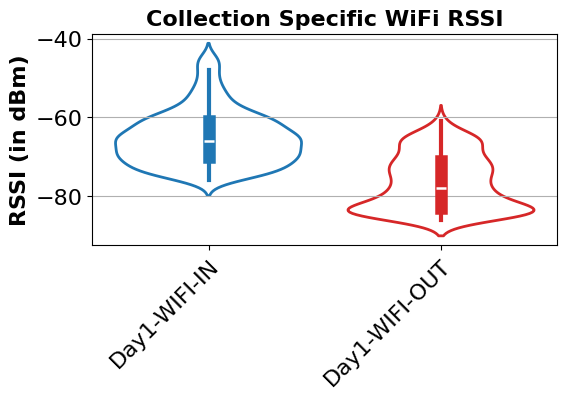

In [9]:
# WIFI RSSI
fig, ax = plt.subplots(figsize=(6, 2.75))
order = ['Day1-WIFI-IN', 'Day1-WIFI-OUT']
palette = ['tab:blue', 'tab:red']
sns.violinplot(data=df_wifi, x='Collection', y='RSSI', hue='Collection', fill=False, linewidth=2, order=order, hue_order=order, palette=palette, ax=ax)
plt.xticks(rotation=45, ha='right')
dx = 10 / 72
dy = 0 / 72
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
# labels = plt.gca().get_xticklabels()
# for label in labels:
#     if label.get_text() in ['NH-b48-IN', 'MNO_A-n77-IN', 'MNO_B-n41-IN']:
#         label.set_fontweight('bold')
plt.xlabel('')
plt.ylabel('RSSI (in dBm)', fontsize=16, fontweight='bold')
plt.title('Collection Specific WiFi RSSI', fontsize=16, fontweight='bold')
plt.grid(True, axis='y')
# plt.savefig('figs/josh_dl_tput_all_plot.png', bbox_inches='tight', dpi=300)
# plt.savefig('figs/josh_dl_tput_all_plot.pdf', bbox_inches='tight')
plt.show()
del fig, ax, dx, dy, offset, label, order, palette

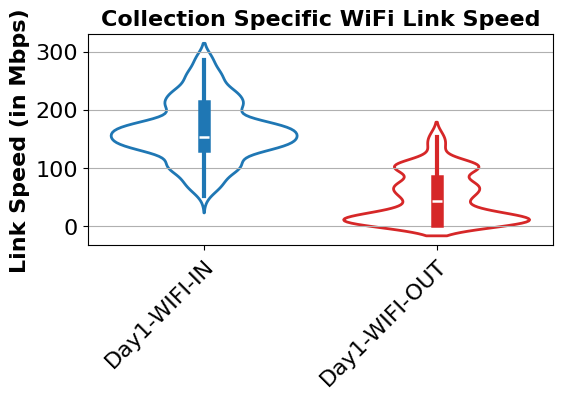

In [10]:
# WIFI Link Speed
fig, ax = plt.subplots(figsize=(6, 2.75))
order = ['Day1-WIFI-IN', 'Day1-WIFI-OUT']
palette = ['tab:blue', 'tab:red']
sns.violinplot(data=df_wifi, x='Collection', y='Link Speed', hue='Collection', fill=False, linewidth=2, order=order, hue_order=order, palette=palette, ax=ax)
plt.xticks(rotation=45, ha='right')
dx = 10 / 72
dy = 0 / 72
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
# labels = plt.gca().get_xticklabels()
# for label in labels:
#     if label.get_text() in ['NH-b48-IN', 'MNO_A-n77-IN', 'MNO_B-n41-IN']:
#         label.set_fontweight('bold')
plt.xlabel('')
plt.ylabel('Link Speed (in Mbps)', fontsize=16, fontweight='bold')
plt.title('Collection Specific WiFi Link Speed', fontsize=16, fontweight='bold')
plt.grid(True, axis='y')
# plt.savefig('figs/josh_dl_tput_all_plot.png', bbox_inches='tight', dpi=300)
# plt.savefig('figs/josh_dl_tput_all_plot.pdf', bbox_inches='tight')
plt.show()
del fig, ax, dx, dy, offset, label, order, palette